<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [2]:
set(y)

{0, 1, 2}

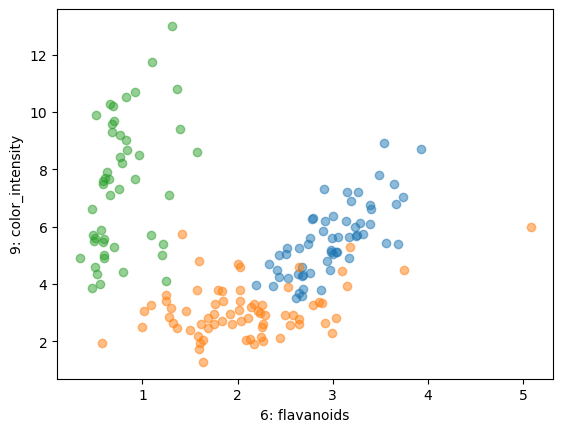

In [3]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [4]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [5]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [6]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([7.91549683e-05, 6.43730164e-05, 6.48498535e-05, 1.04188919e-04,
        4.05311584e-05]),
 'score_time': array([0.00140333, 0.00127935, 0.00102162, 0.00116014, 0.00087452]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[16,  1,  1],
       [ 3, 17,  1],
       [ 2,  7,  6]])

In [8]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.6937941285767373

In [9]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [10]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([5.57899475e-05, 4.67300415e-05, 6.79492950e-05, 4.41074371e-05,
        3.81469727e-05]),
 'score_time': array([0.00213766, 0.00170469, 0.00165272, 0.00141311, 0.00135446]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [11]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([5.41210175e-05, 6.58035278e-05, 3.83853912e-05, 6.38961792e-05,
        6.12735748e-05]),
 'score_time': array([0.00307107, 0.00237012, 0.00259018, 0.00282216, 0.00286293]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [12]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([7.22408295e-05, 5.03063202e-05, 1.27315521e-04, 6.07967377e-05,
        6.38961792e-05, 7.15255737e-05, 4.83989716e-05, 3.21865082e-05,
        3.09944153e-05, 7.05718994e-05, 6.60419464e-05, 6.19888306e-05,
        4.26769257e-05, 3.74317169e-05, 3.43322754e-05, 3.02791595e-05,
        3.40938568e-05, 3.62396240e-05, 3.74317169e-05, 5.57899475e-05,
        3.74317169e-05, 3.19480896e-05, 3.45706940e-05, 2.88486481e-05,
        2.64644623e-05, 3.81469727e-05, 4.72068787e-05, 2.78949738e-05,
        2.45571136e-05, 2.40802765e-05, 3.43322754e-05, 5.43594360e-05,
        3.19480896e-05, 2.83718109e-05, 2.90870667e-05, 2.55107880e-05,
        2.98023224e-05, 4.48226929e-05, 3.17096710e-05, 2.40802765e-05,
        2.52723694e-05, 2.52723694e-05, 2.52723694e-05, 4.93526459e-05,
        3.40938568e-05, 2.76565552e-05, 2.76565552e-05, 2.57492065e-05,
        2.52723694e-05, 3.31401825e-05]),
 'score_time': array([0.00483465, 0.00341892, 0.00321007, 0.00338411, 0.00357914,


In [13]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50

(Perceptron(), 0.572936507936508)

In [14]:
modelo.intercept_

array([-105.,  114.,   19.])

In [15]:
modelo.coef_[:,[6,9]]

array([[  109.82    ,  -490.499995],
       [  416.45    , -1222.54999 ],
       [ -339.16    ,   929.879991]])

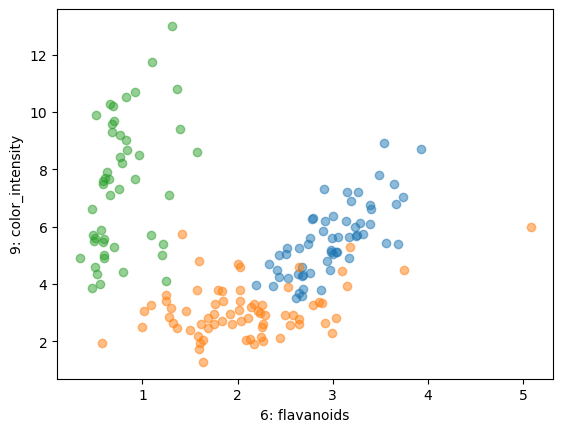

In [16]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)

plt.show()

In [17]:
def plot_hyperplane(X, coef, intercept, column=0, color='black'):
  def line(x0):
    return (-(x0 * coef[0, column]) - intercept[column]) / coef[1, column]
  
  xmin = min(X[:,0])
  xmax = max(X[:,0])
  plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="-", color=color)

0.8764044943820225


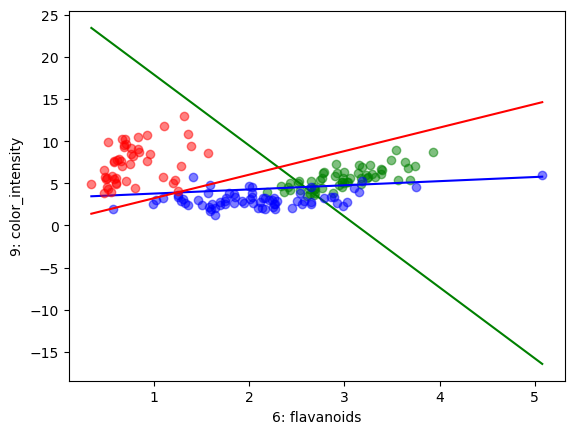

In [18]:
import matplotlib.pyplot as plt

X_subset = X[:, [i, j]]
modelo.fit(X_subset, y)
ypred = modelo.predict(X_subset)

# eval
print(sum(ypred==y)/len(y))

# pontos
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
colors = ['green', 'blue', 'red']
for k in set(y):
    plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5, color=colors[k])
    plot_hyperplane(X_subset, modelo.coef_.T, modelo.intercept_, k, colors[k])

plt.show()